In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
from torch import nn

In [2]:
torch.__version__

'1.13.1+cpu'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import os
current_path = os.getcwd()

In [11]:
# Read in csv and create df

wine_df = pd.read_csv("winequality-red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
# Check for NaN values and empty rows
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

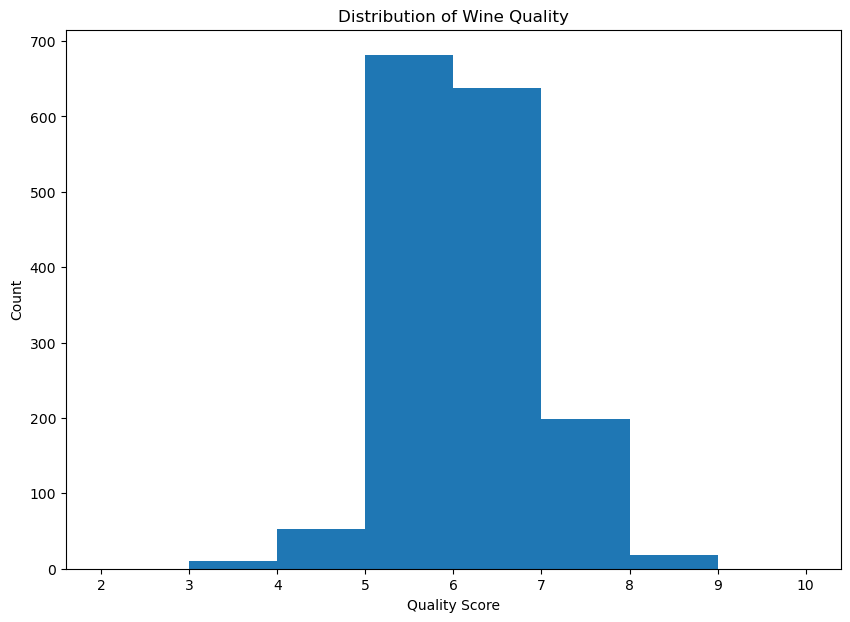

In [38]:
# Investigate distribution of wine qualities

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(wine_df["quality"], bins=np.arange(2, 10.5, 1))
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

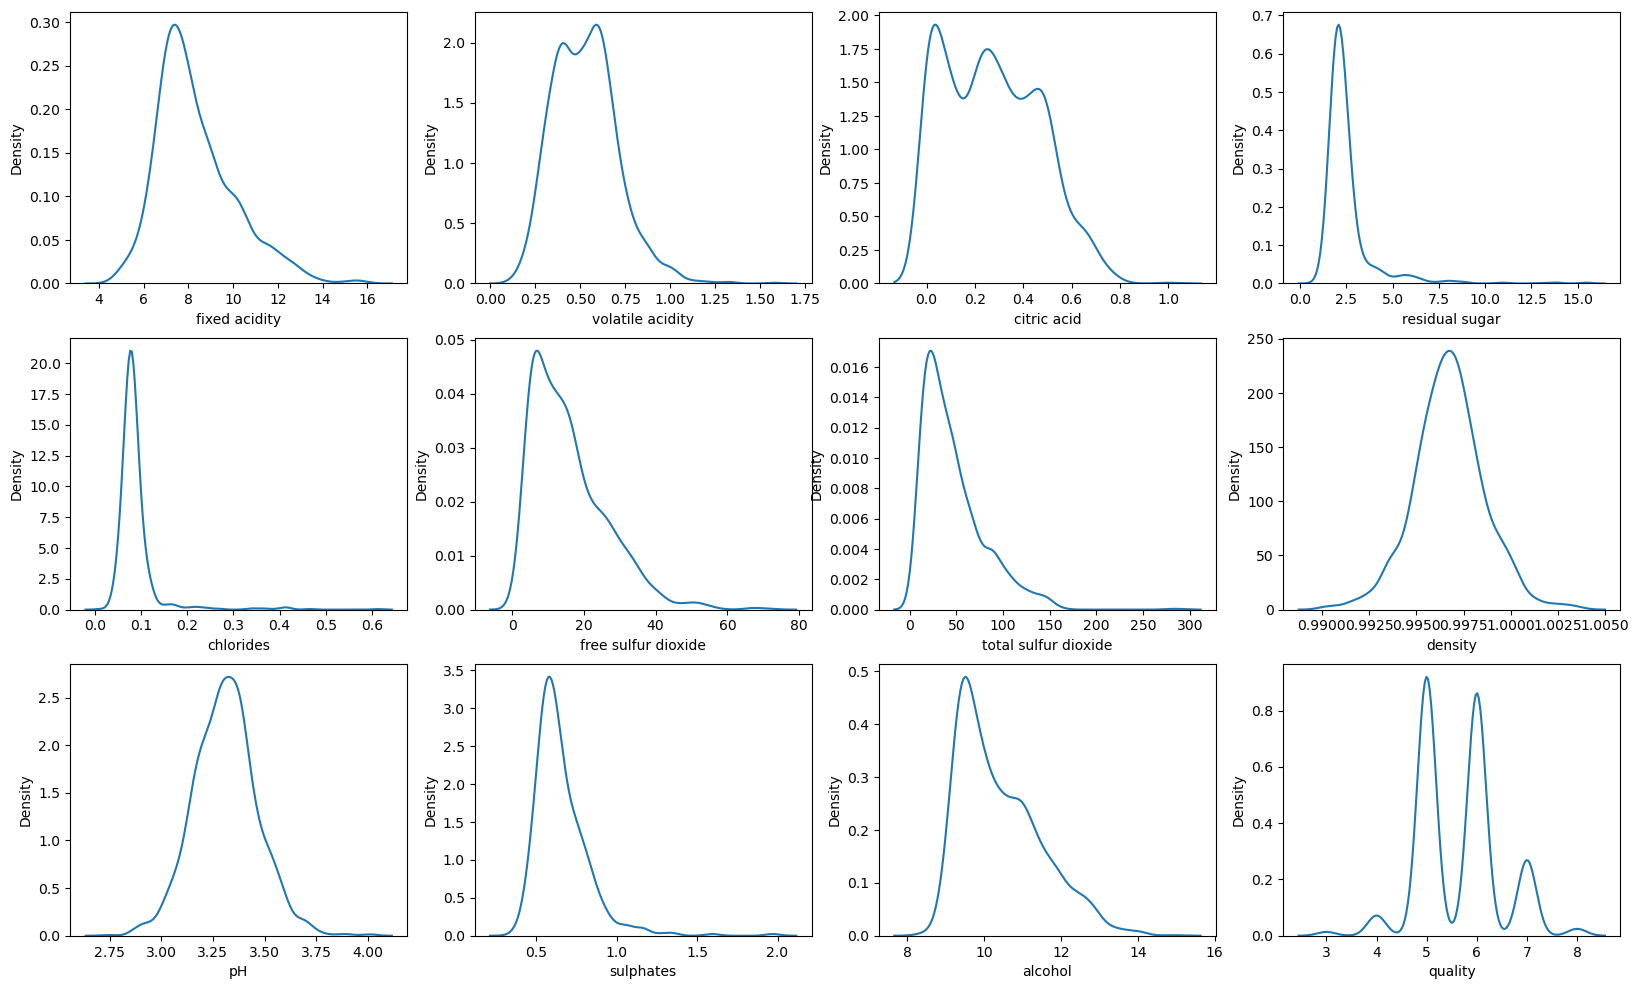

In [73]:
# Density plots of wine attributes

plt.rcParams['figure.figsize'] = [20,12]
fig, ax = plt.subplots(3,4)
sns.kdeplot(wine_df['fixed acidity'], ax=ax[0,0])
sns.kdeplot(wine_df['volatile acidity'], ax=ax[0,1])
sns.kdeplot(wine_df['citric acid'], ax=ax[0,2])
sns.kdeplot(wine_df['residual sugar'], ax=ax[0,3])
sns.kdeplot(wine_df['chlorides'], ax=ax[1,0])
sns.kdeplot(wine_df['free sulfur dioxide'], ax=ax[1,1])
sns.kdeplot(wine_df['total sulfur dioxide'], ax=ax[1,2])
sns.kdeplot(wine_df['density'], ax=ax[1,3])
sns.kdeplot(wine_df['pH'], ax=ax[2,0])
sns.kdeplot(wine_df['sulphates'], ax=ax[2,1])
sns.kdeplot(wine_df['alcohol'], ax=ax[2,2])
sns.kdeplot(wine_df['quality'], ax=ax[2,3])
plt.show()

<AxesSubplot:>

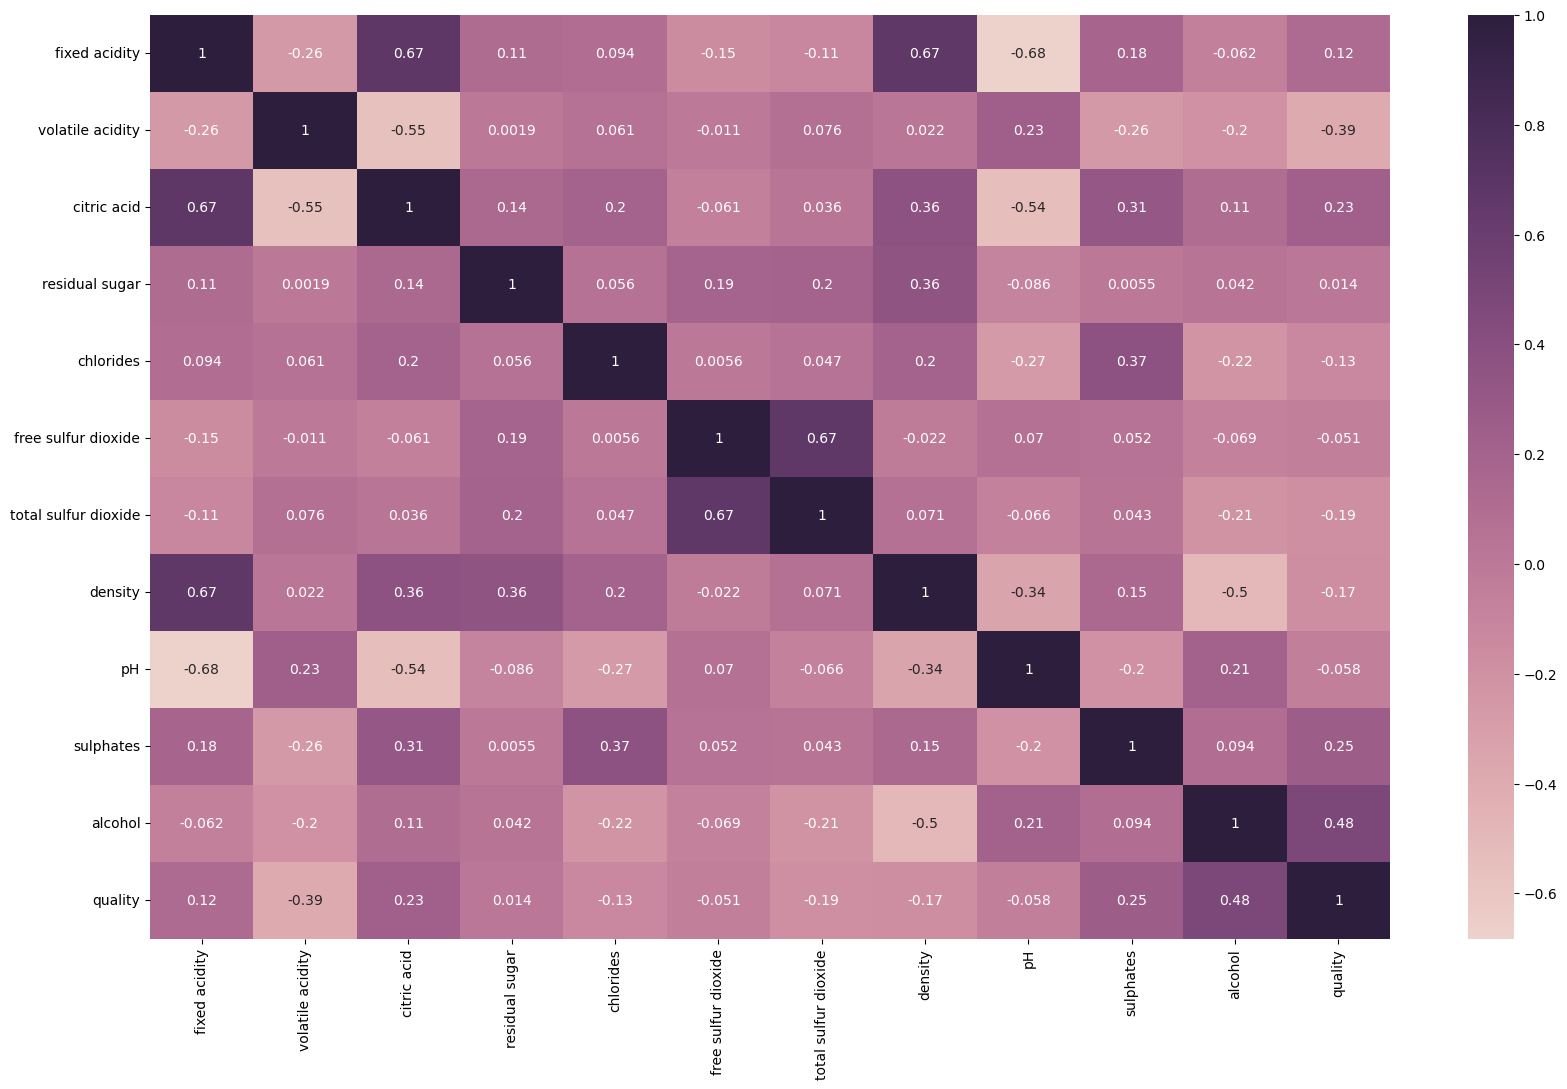

In [76]:
# Investigate correlation between variables

sns.heatmap(wine_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

Strongest correlations with quality seem to be alcohol, sulphates, citric acid, fixed acidity